In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
    )

test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [3]:
# behaves differntly from MNIST / Fashion MNIST
# MNIST / Fashion MNIST returns torch tensor
# it is a numpy array
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
# we are working with color images now
train_dataset.data.shape

(50000, 32, 32, 3)

In [5]:
# behaves differntly from MNIST / Fashion MNIST
# MNIST / Fashion MNIST returns torch tensor
# it is a list
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [6]:
print(type(train_dataset.targets))
print(len(train_dataset.targets))

<class 'list'>
50000


In [7]:
# number of classes
K = len(set(train_dataset.targets))
print("number of classes:", K)

number of classes: 10


In [8]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [9]:
# the data transformer mapped the data to (0, 1)
# and also moved the color channel before height/width yielded by dataloader
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=1,
                                         shuffle=True)

for x, y in tmp_loader:
    print(x)
    print(x.shape)
    break 

tensor([[[[0.1333, 0.1294, 0.1333,  ..., 0.2039, 0.2235, 0.2078],
          [0.1333, 0.1216, 0.1216,  ..., 0.1922, 0.2235, 0.2196],
          [0.1294, 0.1176, 0.1216,  ..., 0.1804, 0.2078, 0.2235],
          ...,
          [0.0745, 0.0706, 0.0627,  ..., 0.1804, 0.1843, 0.1922],
          [0.0784, 0.0745, 0.0706,  ..., 0.1843, 0.1843, 0.1882],
          [0.0784, 0.0706, 0.0706,  ..., 0.1843, 0.1765, 0.1804]],

         [[0.5255, 0.5294, 0.5412,  ..., 0.5725, 0.5804, 0.5569],
          [0.5294, 0.5294, 0.5373,  ..., 0.5647, 0.5843, 0.5725],
          [0.5216, 0.5255, 0.5294,  ..., 0.5529, 0.5647, 0.5725],
          ...,
          [0.4588, 0.4510, 0.4471,  ..., 0.5569, 0.5608, 0.5608],
          [0.4667, 0.4588, 0.4549,  ..., 0.5608, 0.5647, 0.5647],
          [0.4588, 0.4510, 0.4510,  ..., 0.5569, 0.5529, 0.5490]],

         [[0.5412, 0.5451, 0.5529,  ..., 0.5961, 0.6078, 0.5882],
          [0.5490, 0.5412, 0.5490,  ..., 0.5922, 0.6157, 0.6039],
          [0.5412, 0.5373, 0.5412,  ..., 0

In [20]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)
        
        self.fc1 = nn.Linear(128 * 3 * 3, 1024)
        self.fc2 = nn.Linear(1024, K)
        
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        # in this case we specify second dimention explicitly
        x = x.view(-1, 128 * 3 * 3)
        x = F.dropout(x, p=0.5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2)
        x = self.fc2(x)
        
        return x

In [21]:
model = CNN(K)

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [39]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    
    for it in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            
        train_loss = np.mean(train_loss)
        
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
            
        test_loss = np.mean(test_loss)
        
        train_losses[it] = train_loss
        test_losses[it] = test_loss
        
        dt = datetime.now() - t0
    
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}')
        
    return train_losses, test_losses
            

In [40]:
train_losses, test_losses = batch_gd(model,
                                     criterion,
                                     optimizer,
                                     train_loader,
                                     test_loader,
                                     epochs=15)

Epoch 1/15, Train Loss: 0.9476, Test Loss: 1.0384, Duration: 0:00:15.690594
Epoch 2/15, Train Loss: 0.8981, Test Loss: 1.0547, Duration: 0:00:15.721711
Epoch 3/15, Train Loss: 0.8640, Test Loss: 1.0194, Duration: 0:00:15.640923
Epoch 4/15, Train Loss: 0.8213, Test Loss: 0.9811, Duration: 0:00:15.695174
Epoch 5/15, Train Loss: 0.7820, Test Loss: 0.9626, Duration: 0:00:15.705015
Epoch 6/15, Train Loss: 0.7445, Test Loss: 0.9796, Duration: 0:00:15.579398
Epoch 7/15, Train Loss: 0.7258, Test Loss: 0.9671, Duration: 0:00:15.687004
Epoch 8/15, Train Loss: 0.6988, Test Loss: 0.9933, Duration: 0:00:15.655055
Epoch 9/15, Train Loss: 0.6679, Test Loss: 0.9771, Duration: 0:00:15.684705
Epoch 10/15, Train Loss: 0.6464, Test Loss: 0.9765, Duration: 0:00:15.516723
Epoch 11/15, Train Loss: 0.6262, Test Loss: 0.9926, Duration: 0:00:15.579649
Epoch 12/15, Train Loss: 0.6041, Test Loss: 0.9683, Duration: 0:00:15.723961
Epoch 13/15, Train Loss: 0.5916, Test Loss: 0.9851, Duration: 0:00:15.798456
Epoch 14

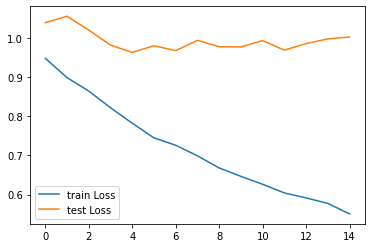

In [41]:
plt.plot(train_losses, label='train Loss')
plt.plot(test_losses, label='test Loss')
plt.legend()
plt.show()

In [49]:
n_correct = 0
n_total = 0

for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
    
train_acc = n_correct / n_total

n_correct = 0
n_total = 0
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
    
test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}") 

# difficult dataset than mnist and fasion mnist

Train acc: 0.8108, Test acc: 0.6738


In [50]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, newaxis]
        print('Normlized Confusion Matrix')
    else:
        print('Confusion Matrix, Without Normaliztion')
                                         
    print(cm)                                     
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
                                         
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

Confusion Matrix, Without Normaliztion
[[753  32  62   8  16   6   9   8  72  34]
 [ 30 832   7   3   2   1  10   3  31  81]
 [ 68  14 628  54  81  41  56  25  20  13]
 [ 40  24 124 415  77 153  77  47  21  22]
 [ 40   7  94  46 651  26  61  56  15   4]
 [ 23  10 105 187  62 517  26  44  13  13]
 [ 19  11  61  62  56  22 742   7  11   9]
 [ 34   8  63  38  78  46  10 676   8  39]
 [ 84  38  33  10   6   7   4   2 791  25]
 [ 53 116  16  10   4   4   6  14  38 739]]


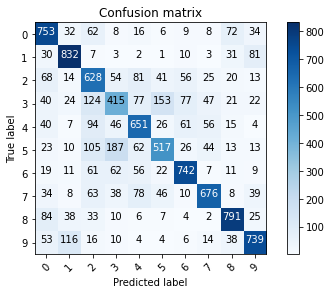

In [52]:
# get all predictions in an array and plot confuion matrix

x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])


for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    
    _, predictions = torch.max(outputs, 1)
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))
    
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm , list(range(10)))

In [53]:
print(test_dataset.data.shape)
print(x_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [54]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

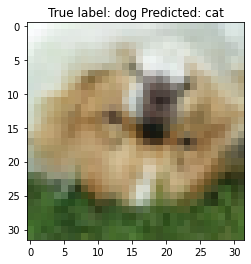

In [63]:
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));